### Sales Prediction for Big Mart Outlets

    The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

    Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

## Variable Description

* Item_Identifier: Unique product ID
* Item_Weight: Weight of product
* Item_Fat_Content: Whether the product is low fat or not
* Item_Visibility: The % of total display area of all products in a store allocated to the particular product
* Item_Type: The category to which the product belongs
* Item_MRP: Maximum Retail Price (list price) of the product
* Outlet_Identifier: Unique store ID
* Outlet_Establishment_Year: The year in which store was established
* Outlet_Size: The size of the store in terms of ground area covered
* Outlet_Location_Type: The type of city in which the store is located
* Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
* Item_Outlet_Sales: Sales of the product in the particular store. This is the outcome variable to be predicted.

In [119]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [120]:
train_data=pd.read_csv(r'D:/train_v9rqX0R.csv')
train_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [121]:
train_data.shape

(8523, 12)

In [122]:
test_data=pd.read_csv(r'D:\test_AbJTz2l.csv')
test_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [123]:
test_data.shape

(5681, 11)

In [124]:
data=pd.concat([train_data,test_data],axis=0,ignore_index=True)


In [125]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [126]:
data.shape

(14204, 12)

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [128]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [129]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [130]:
#data.tail()NCF18
#FIL=data.Item_Identifier=='NCF18'
#data.loc[FIL]
#er=data.Outlet_Location_Type=='Tier 3'
#er=
#er.Outlet_Size.value_counts()


In [131]:
data.Item_Identifier.unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [132]:
data.nunique()

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3493
dtype: int64

In [133]:
num_cols = data.select_dtypes(include = 'O')
num_cols

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
14199,FDB58,Regular,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1
14200,FDD47,Regular,Starchy Foods,OUT018,Medium,Tier 3,Supermarket Type2
14201,NCO17,Low Fat,Health and Hygiene,OUT045,NaN,Tier 2,Supermarket Type1
14202,FDJ26,Regular,Canned,OUT017,NaN,Tier 2,Supermarket Type1


In [134]:
num_cols.value_counts()

Item_Identifier  Item_Fat_Content  Item_Type     Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type      
DRA12            LF                Soft Drinks   OUT035             Small        Tier 2                Supermarket Type1    1
FDV28            Regular           Frozen Foods  OUT019             Small        Tier 1                Grocery Store        1
FDV27            Regular           Meat          OUT013             High         Tier 3                Supermarket Type1    1
                                                 OUT019             Small        Tier 1                Grocery Store        1
                                                 OUT027             Medium       Tier 3                Supermarket Type3    1
                                                                                                                           ..
FDJ26            Regular           Canned        OUT019             Small        Tier 1                Grocery Store       

In [135]:
num_cols.nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [136]:
num_cols.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [137]:
data.Outlet_Size.value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [138]:
data.Item_Fat_Content.value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

#replacing unique values in data type Item_Fat_Content to make data inorder

In [139]:
data.replace({'Item_Fat_Content':{'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}},inplace=True)


In [140]:
data.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [141]:
num_cols.isna().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             4016
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [142]:
data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

#filling outlet size based on the type of outlet . In the logic grocery store should be small

In [143]:
mode_of_Outlet_size = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
mode_of_Outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [144]:
miss_values = data['Outlet_Size'].isnull()   

In [145]:
data.loc[miss_values, 'Outlet_Size'] = data.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])

In [146]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [147]:
num_cols = data.select_dtypes(exclude = 'O')
num_cols

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.30,0.016047,249.8092,1999,3735.1380
1,5.92,0.019278,48.2692,2009,443.4228
2,17.50,0.016760,141.6180,1999,2097.2700
3,19.20,0.000000,182.0950,1998,732.3800
4,8.93,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
14199,10.50,0.013496,141.3154,1997,NaN
14200,7.60,0.142991,169.1448,2009,NaN
14201,10.00,0.073529,118.7440,2002,NaN
14202,15.30,0.000000,214.6218,2007,NaN


In [148]:
num_cols.isna().sum()

Item_Weight                  2439
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales            5681
dtype: int64

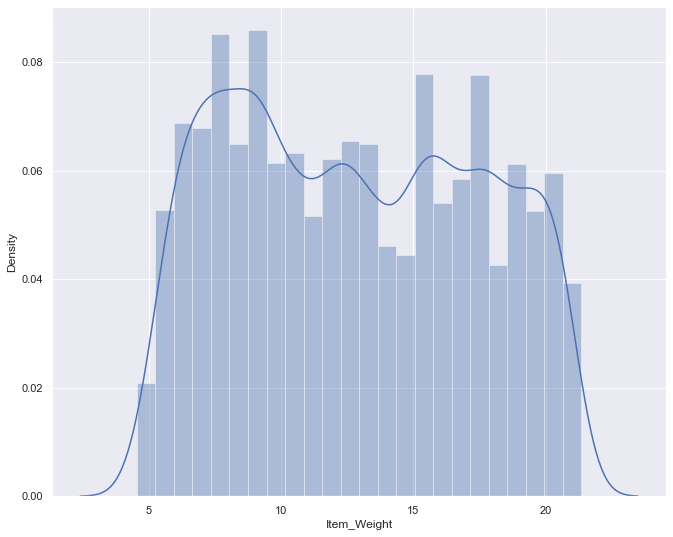

In [149]:
sns.distplot(data['Item_Weight'])
plt.show()

In [150]:
data['Item_Weight']=data['Item_Weight'].fillna(data['Item_Weight'].mean())

In [151]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

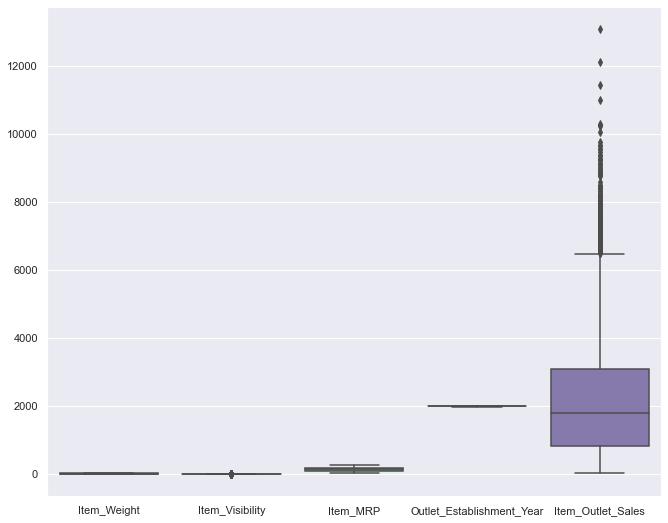

In [152]:
sns.boxplot(data=data)
plt.show()

In [153]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.234226,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.300000,0.027036,94.012000,1987.000000,834.247400
50%,12.792854,0.054021,142.247000,1999.000000,1794.331000
75%,16.000000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [154]:
data['Outlet_Establishment_Year']

0        1999
1        2009
2        1999
3        1998
4        1987
         ... 
14199    1997
14200    2009
14201    2002
14202    2007
14203    2002
Name: Outlet_Establishment_Year, Length: 14204, dtype: int64

In [155]:
data['Outlet_Establishment_Year'] = data['Outlet_Establishment_Year'].max()-data['Outlet_Establishment_Year']


In [156]:
data['Outlet_Establishment_Year']

0        10
1         0
2        10
3        11
4        22
         ..
14199    12
14200     0
14201     7
14202     2
14203     7
Name: Outlet_Establishment_Year, Length: 14204, dtype: int64

In [157]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Item_Weight,14204.0,12.792854,4.234226,4.555,9.300000,12.792854,16.000000,21.350000
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,11.169319,8.371664,0.000,5.000000,10.000000,22.000000,24.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


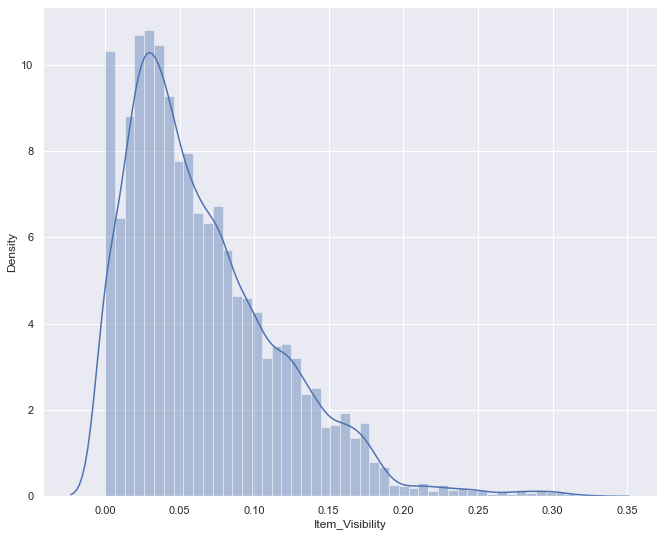

In [158]:
sns.distplot(data['Item_Visibility'])
plt.show()

In [159]:
data.describe(include='O').transpose()

,count,unique,top,freq
Item_Identifier,14204,1559,FDU15,10
Item_Fat_Content,14204,2,Low Fat,9185
Item_Type,14204,16,Fruits and Vegetables,2013
Outlet_Identifier,14204,10,OUT027,1559
Outlet_Size,14204,3,Small,7996
Outlet_Location_Type,14204,3,Tier 3,5583
Outlet_Type,14204,4,Supermarket Type1,9294


In [160]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,10,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,0,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,10,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,11,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,22,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,12,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,0,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,7,Small,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2,Small,Tier 2,Supermarket Type1,NaN


In [161]:
col=['Item_Identifier','Item_Type','Outlet_Identifier']
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
for i in col:
    data[i]=lc.fit_transform(data[i])

In [162]:
data=pd.get_dummies(data,drop_first=True)

In [163]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,9.30,0.016047,4,249.8092,9,10,3735.1380,0,1,0,0,0,1,0,0
1,8,5.92,0.019278,14,48.2692,3,0,443.4228,1,1,0,0,1,0,1,0
2,662,17.50,0.016760,10,141.6180,9,10,2097.2700,0,1,0,0,0,1,0,0
3,1121,19.20,0.000000,6,182.0950,0,11,732.3800,1,0,1,0,1,0,0,0
4,1297,8.93,0.000000,9,53.8614,1,22,994.7052,0,0,0,0,1,1,0,0


In [164]:
train=data.iloc[:8523,:]
test=data.iloc[8523:,:]

#data without scaling provides better resultS ,So avoid scaling

In [165]:
#from sklearn.preprocessing import RobustScaler
#rs = RobustScaler(quantile_range=(0.25, 0.75), with_centering = True)
#data_rs = rs.fit_transform(train)
#data_df = pd.DataFrame(data_rs, columns = data.columns)
#data_df

In [166]:
data.describe()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000,14204.000000,14204.000000,14204.00000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,780.193889,12.792854,0.065953,7.229372,141.004977,4.722473,11.169319,2181.288914,0.353351,0.327725,0.56294,0.326739,0.393058,0.654323,0.108843,0.109758
std,449.619658,4.234226,0.051459,4.213471,62.086938,2.837101,8.371664,1706.499616,0.478027,0.469400,0.49604,0.469037,0.488447,0.475605,0.311453,0.312599
min,0.000000,4.555000,0.000000,0.000000,31.290000,0.000000,0.000000,33.290000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,391.000000,9.300000,0.027036,4.000000,94.012000,2.000000,5.000000,834.247400,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,782.000000,12.792854,0.054021,6.000000,142.247000,5.000000,10.000000,1794.331000,0.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1169.000000,16.000000,0.094037,10.000000,185.855600,7.000000,22.000000,3101.296400,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1558.000000,21.350000,0.328391,15.000000,266.888400,9.000000,24.000000,13086.964800,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

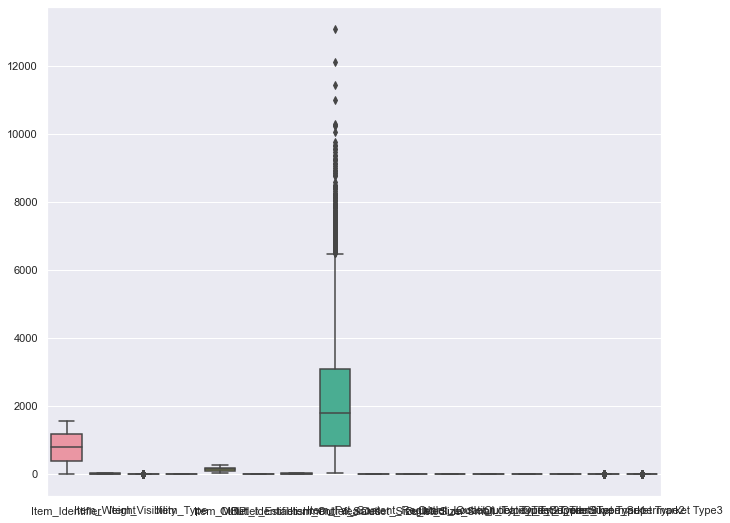

In [167]:
sns.boxplot(data=data)

In [168]:
#data1=pd.DataFrame(data1,columns=data.drop('Item_Outlet_Sales',axis=1).columns)
#data1

In [169]:
#data1.describe()

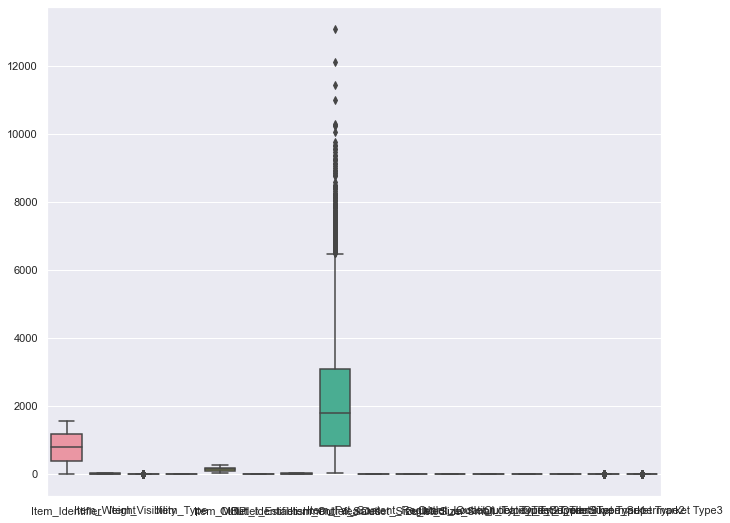

In [171]:
sns.set(rc = {'figure.figsize':(11, 9)})
sns.boxplot(data = data )
plt.show()

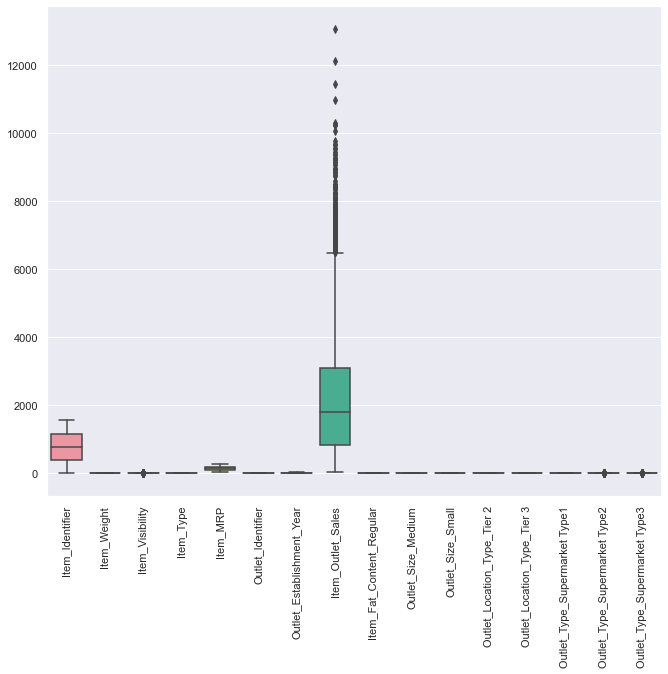

In [172]:
sns.set(rc = {'figure.figsize':(11, 9)})
sns.boxplot(data =data )
plt.xticks(rotation=90)
plt.show()


In [173]:
x=train.drop('Item_Outlet_Sales',axis=1)
y=train['Item_Outlet_Sales']


In [174]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [175]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print('\t\t mean_squared error :',mean_squared_error(y_test,y_pred))
print('\t\t r2_score :',r2_score(y_test,y_pred))
print('\t\t root_mean_square :',sqrt(mean_squared_error(y_test, y_pred)))

		 mean_squared error : 1140131.1050593217
		 r2_score : 0.5805210958491036
		 root_mean_square : 1067.7692190072355


In [176]:
y_pred

array([1358.91264113,  703.99382308,  845.00357795, ...,  815.54531731,
        584.24139261, 1700.85254191])

In [177]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print('\t\t mean_squared error :',mean_squared_error(y_test,y_pred))
print('\t\t r2_score :',r2_score(y_test,y_pred))
print('\t\t root_mean_square :',sqrt(mean_squared_error(y_test, y_pred)))

		 mean_squared error : 2326973.3740266203
		 r2_score : 0.1438561437421595
		 root_mean_square : 1525.4420257835498


In [178]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('\t\t mean_squared error :',mean_squared_error(y_test,y_pred))
print('\t\t r2_score :',r2_score(y_test,y_pred))
print('\t\t root_mean_square :',sqrt(mean_squared_error(y_test, y_pred)))

		 mean_squared error : 1216685.8986866323
		 r2_score : 0.5523549307512647
		 root_mean_square : 1103.0348583279824


In [179]:
from xgboost import XGBRegressor
xg=XGBRegressor()
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
print('\t\t mean_squared error :',mean_squared_error(y_test,y_pred))
print('\t\t r2_score :',r2_score(y_test,y_pred))
print('\t\t root_mean_square :',sqrt(mean_squared_error(y_test, y_pred)))

		 mean_squared error : 1267048.8457544288
		 r2_score : 0.5338253127520174
		 root_mean_square : 1125.632642452425


In [180]:
test=test.drop('Item_Outlet_Sales',axis=1)

In [181]:
sample=pd.read_csv(r'D:\sample_submission_8RXa3c6.csv')

In [196]:
y_pred=rf.predict(test)
sample['Item_Outlet_Sales']=y_pred
sample.to_csv("submission12.csv",index=False)

In [197]:
sample['Item_Outlet_Sales']

0       1618.280164
1       1353.451556
2        501.320768
3       2088.894236
4       5888.721364
           ...     
5676    2196.327724
5677    2183.843974
5678    2102.523162
5679    4581.023584
5680    1416.849032
Name: Item_Outlet_Sales, Length: 5681, dtype: float64

In [198]:
e=pd.read_csv(r'C:\Users\shaha\Downloads\submission12.csv')

In [199]:
e.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1618.280164
1,FDW14,OUT017,1353.451556
2,NCN55,OUT010,501.320768
3,FDQ58,OUT017,2088.894236
4,FDY38,OUT027,5888.721364


In [200]:
e.Item_Outlet_Sales.describe()

count    5681.000000
mean     2211.541693
std      1403.041253
min        54.009696
25%      1028.181624
50%      2103.761550
75%      3129.559610
max      9103.603244
Name: Item_Outlet_Sales, dtype: float64

In [201]:
train.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [202]:
y_pred

array([1618.280164, 1353.451556,  501.320768, ..., 2102.523162,
       4581.023584, 1416.849032])

In [203]:
data.describe()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000,8523.000000,14204.000000,14204.000000,14204.00000,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,780.193889,12.792854,0.065953,7.229372,141.004977,4.722473,11.169319,2181.288914,0.353351,0.327725,0.56294,0.326739,0.393058,0.654323,0.108843,0.109758
std,449.619658,4.234226,0.051459,4.213471,62.086938,2.837101,8.371664,1706.499616,0.478027,0.469400,0.49604,0.469037,0.488447,0.475605,0.311453,0.312599
min,0.000000,4.555000,0.000000,0.000000,31.290000,0.000000,0.000000,33.290000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,391.000000,9.300000,0.027036,4.000000,94.012000,2.000000,5.000000,834.247400,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,782.000000,12.792854,0.054021,6.000000,142.247000,5.000000,10.000000,1794.331000,0.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1169.000000,16.000000,0.094037,10.000000,185.855600,7.000000,22.000000,3101.296400,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1558.000000,21.350000,0.328391,15.000000,266.888400,9.000000,24.000000,13086.964800,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [204]:
data.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [205]:
test.shape

(5681, 15)

In [206]:
sample.shape

(5681, 3)

In [207]:
test

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8523,1114,20.750000,0.007565,13,107.8622,9,10,0,1,0,0,0,1,0,0
8524,1078,8.300000,0.038428,4,87.3198,2,2,1,0,1,1,0,1,0,0
8525,1420,14.600000,0.099575,11,241.7538,0,11,0,0,1,0,1,0,0,0
8526,817,7.315000,0.015388,13,155.0340,2,2,0,0,1,1,0,1,0,0
8527,1197,12.792854,0.118599,4,234.2300,5,24,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,233,10.500000,0.013496,13,141.3154,8,12,1,0,1,0,0,1,0,0
14200,308,7.600000,0.142991,15,169.1448,3,0,1,1,0,0,1,0,1,0
14201,1426,10.000000,0.073529,8,118.7440,7,7,0,0,1,1,0,1,0,0
14202,521,15.300000,0.000000,3,214.6218,2,2,1,0,1,1,0,1,0,0


In [208]:
train

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,156,9.300,0.016047,4,249.8092,9,10,3735.1380,0,1,0,0,0,1,0,0
1,8,5.920,0.019278,14,48.2692,3,0,443.4228,1,1,0,0,1,0,1,0
2,662,17.500,0.016760,10,141.6180,9,10,2097.2700,0,1,0,0,0,1,0,0
3,1121,19.200,0.000000,6,182.0950,0,11,732.3800,1,0,1,0,1,0,0,0
4,1297,8.930,0.000000,9,53.8614,1,22,994.7052,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0.056783,13,214.5218,1,22,2778.3834,0,0,0,0,1,1,0,0
8519,897,8.380,0.046982,0,108.1570,7,7,549.2850,1,0,1,1,0,1,0,0
8520,1357,10.600,0.035186,8,85.1224,6,5,1193.1136,0,0,1,1,0,1,0,0
8521,681,7.210,0.145221,13,103.1332,3,0,1845.5976,1,1,0,0,1,0,1,0


In [209]:
test

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Fat_Content_Regular,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
8523,1114,20.750000,0.007565,13,107.8622,9,10,0,1,0,0,0,1,0,0
8524,1078,8.300000,0.038428,4,87.3198,2,2,1,0,1,1,0,1,0,0
8525,1420,14.600000,0.099575,11,241.7538,0,11,0,0,1,0,1,0,0,0
8526,817,7.315000,0.015388,13,155.0340,2,2,0,0,1,1,0,1,0,0
8527,1197,12.792854,0.118599,4,234.2300,5,24,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,233,10.500000,0.013496,13,141.3154,8,12,1,0,1,0,0,1,0,0
14200,308,7.600000,0.142991,15,169.1448,3,0,1,1,0,0,1,0,1,0
14201,1426,10.000000,0.073529,8,118.7440,7,7,0,0,1,1,0,1,0,0
14202,521,15.300000,0.000000,3,214.6218,2,2,1,0,1,1,0,1,0,0
